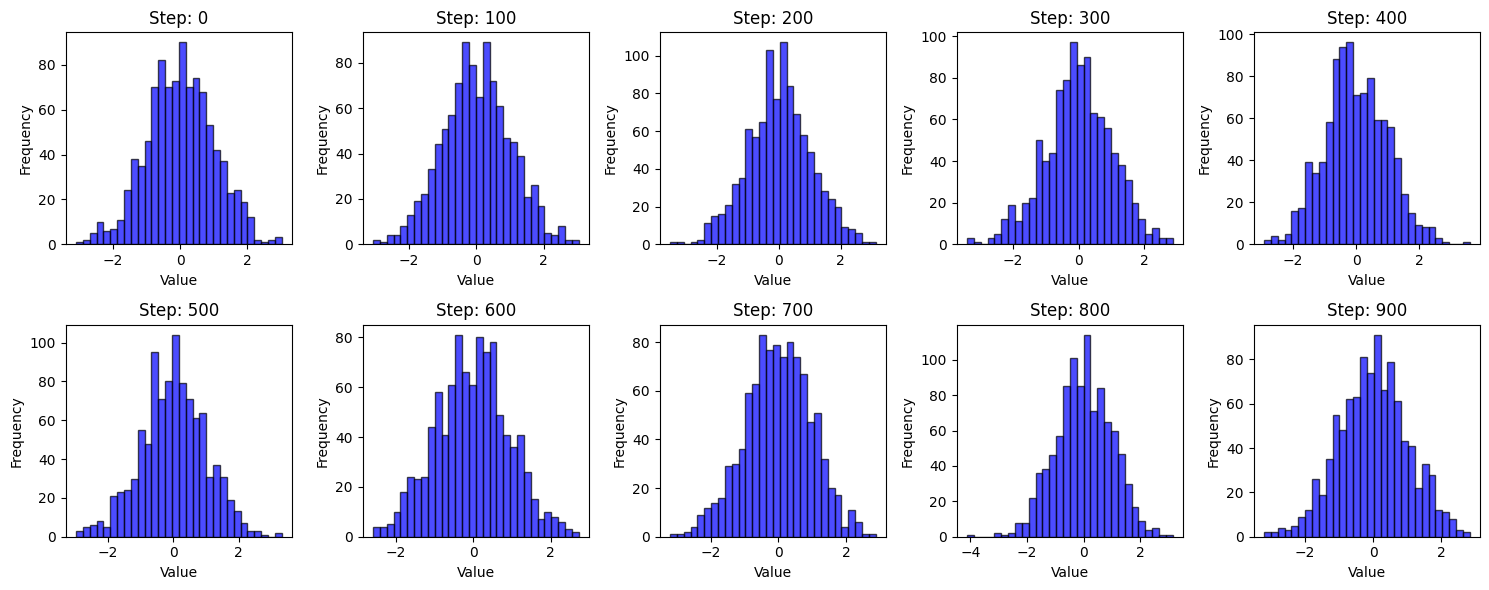

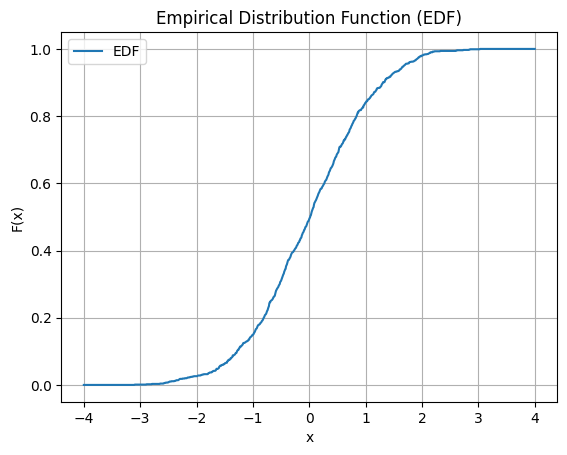

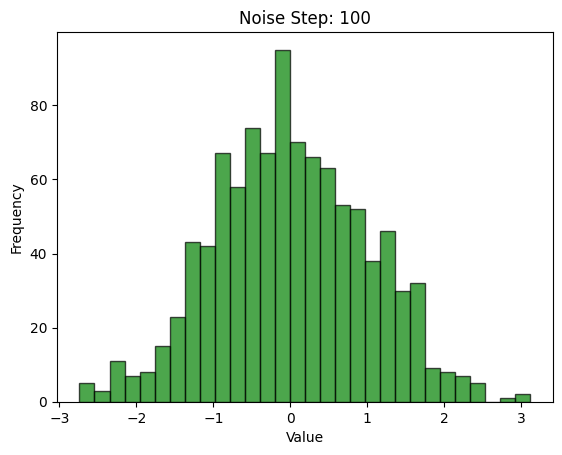

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# シードの設定 (PyTorchとNumPy)
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)  # 必要に応じて
np.random.seed(seed)

# 共通の学習データ（元の正規乱数データ）
original_x = torch.randn(1000)  # 1Dデータ (サンプル数: 1000)

# 拡散モデルの設定
T = 1000
betas = torch.linspace(0.0001, 0.02, T)

# 拡散モデル: ノイズ付加プロセス
x = original_x.clone()  # データをコピーして使用
samples = []

for t in range(T):
    if t % 100 == 0:  # 途中経過を保存
        samples.append(x.clone().numpy())

    beta = betas[t]
    eps = torch.randn_like(x)
    x = torch.sqrt(1 - beta) * x + torch.sqrt(beta) * eps

# 拡散モデル: ノイズステップごとのデータを可視化
plt.figure(figsize=(15, 6))
for i, sample in enumerate(samples[:10]):
    plt.subplot(2, 5, i + 1)
    plt.hist(sample, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Step: {i * 100}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# ============================================
# 経験分布関数（EDF）の計算
# ============================================

# PyTorchテンソルをNumPy配列に変換
data = original_x.numpy()

# 経験分布関数（EDF）の定義
def empirical_distribution_function(data, x):
    return np.mean(data <= x)

# EDFのプロット
x_vals = np.linspace(-4, 4, 1000)
edf_vals = [empirical_distribution_function(data, x) for x in x_vals]

plt.plot(x_vals, edf_vals, label="EDF")
plt.title("Empirical Distribution Function (EDF)")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.grid(True)
plt.show()

# ============================================
# q(x_t|x_0) 関数の1Dバージョン
# ============================================
def add_noise(x_0, t, betas):
    T = len(betas)
    assert t >= 1 and t <= T
    t_idx = t - 1  # betas[0]はt=1用

    # アルファバーの計算
    alphas = 1 - betas
    alpha_bars = torch.cumprod(alphas, dim=0)
    alpha_bar = alpha_bars[t_idx]

    eps = torch.randn_like(x_0)
    x_t = torch.sqrt(alpha_bar) * x_0 + torch.sqrt(1 - alpha_bar) * eps
    return x_t

# q(x_t|x_0): 特定ステップでのノイズ付加
t = 100
x_t = add_noise(original_x, t, betas)

# 結果をヒストグラムで表示
plt.hist(x_t.numpy(), bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title(f"Noise Step: {t}")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
